In [129]:
#Import the needed libraries 
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
#read the input file
df = pd.read_csv('train.csv')
df.head(5)
 #for the purpose of simple linear regression reduce the dataset to only area (LotArea) and price (SalePrice)
df_slr = df[['LotArea','SalePrice']]  
df_slr.shape

(1460, 2)

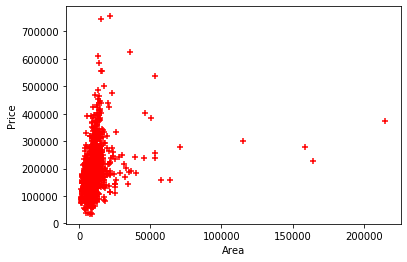

In [131]:
#Plot the data
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df_slr['LotArea'],df_slr['SalePrice'],color='red',marker='+')

In [132]:
#remove the outliers over the 75th percentile
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_slr))

Q1 = df_slr.quantile(0.25)
Q3 = df_slr.quantile(0.75)
IQR = Q3 - Q1

df_slr_out = df_slr[(z < 3).all(axis=1)]
df_slr = df_slr_out[~((df_slr < (Q1 - 1.5 * IQR)) |(df_slr_out > (Q3 + 1.5 * IQR))).any(axis=1)]



c:\users\user-5\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


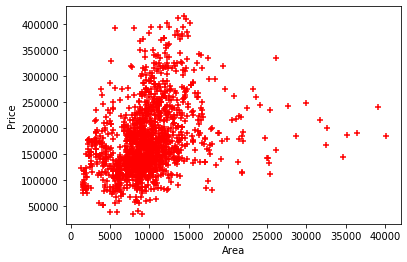

In [133]:
#Plot the data
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df_slr_out['LotArea'],df_slr_out['SalePrice'],color='red',marker='+')
#ah, much better!

In [134]:
#Split the dataframe in X and y
x = df_slr.drop('SalePrice',axis='columns')
y = df_slr['SalePrice']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

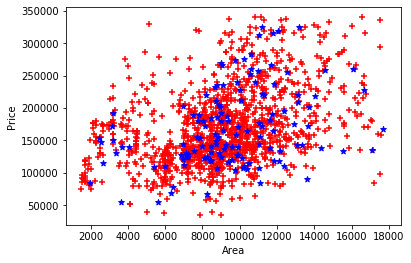

In [136]:
#Split the dataframe in X and y
x = df_slr.drop('SalePrice',axis='columns')
y = df_slr['SalePrice']

#Plot the data
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(X_train,y_train,color='red',marker='+')
plt.scatter(X_test,y_test,color='blue',marker='*')

In [137]:
# Create linear regression object
reg = linear_model.LinearRegression(normalize=False)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_pred = reg.predict(X_test)

Coefficients: 
 [7.39205395]
Mean squared error: 3097471808.77
Variance score: 0.12


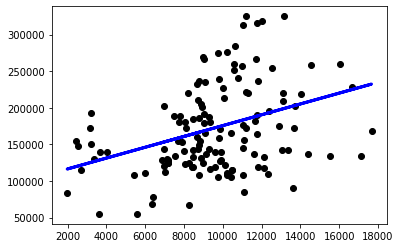

In [139]:
# The coefficient
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

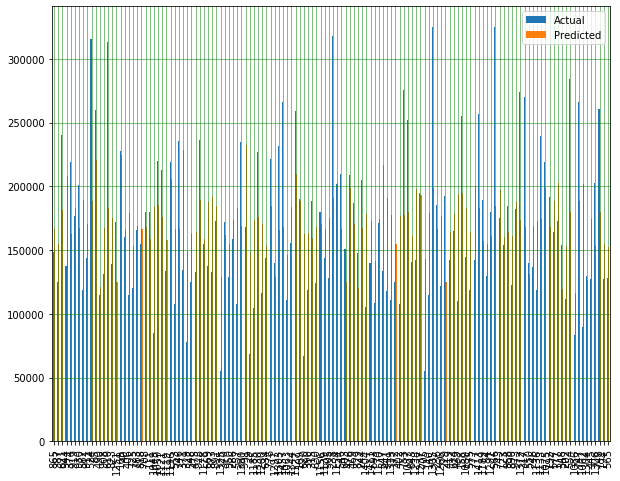

In [140]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [141]:
#So given the distribution of the data, a linear regression model is not appropriate at all!